<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
# Convert the 'Class' column to a NumPy array
Y = df['Class'].to_numpy()

# Display the first few elements to confirm
print(Y[:10])  # Displaying first 10 elements of the array

NameError: name 'df' is not defined

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Display the first few rows of the dataset to verify
print(df.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  
0            0  B0003  -80.577366  28.561857  
1         

In [11]:
# Check the column names in the DataFrame
print(df.columns)

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')


In [14]:
# Create a new 'Class' column based on the 'Outcome' column
df['Class'] = df['Outcome'].apply(lambda x: 1 if 'success' in x.lower() else 0)

# Convert the new 'Class' column to a NumPy array
Y = df['Class'].to_numpy()

# Display the first few elements to confirm
print(Y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [15]:
# Check unique values in the 'Outcome' column
print(df['Outcome'].unique())

['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']


In [16]:
# Create the landing_class column based on whether 'True' is in the Outcome
df['landing_class'] = df['Outcome'].apply(lambda x: 1 if 'True' in x else 0)

# Check the first few rows to confirm
print(df[['Outcome', 'landing_class']].head())

       Outcome  landing_class
0    None None              0
1    None None              0
2    None None              0
3  False Ocean              0
4    None None              0


In [17]:
# Convert the 'landing_class' column to a NumPy array and assign it to Y
Y = df['landing_class'].to_numpy()

# Display the first few elements to verify
print(Y[:10])  # Output first 10 values for checking

[0 0 0 0 0 0 1 1 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [18]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [19]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Select feature columns for X
# Example: X = df[['PayloadMass', 'Orbit']]  # Replace with your actual feature columns
X = df[['PayloadMass']]  # Modify this based on your features

# Standardize the data in X
transform = preprocessing.StandardScaler()
X_standardized = transform.fit_transform(X)  # Standardize the features
X = pd.DataFrame(X_standardized, columns=X.columns)  # Convert back to DataFrame if needed

# Split the data into training and testing sets
Y = df['landing_class']  # Assuming Y is already defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now X_train, X_test, Y_train, Y_test are ready for training the model
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (72, 1)
Testing features shape: (18, 1)


In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Step 1: Standardize the data
transform = preprocessing.StandardScaler()
X_standardized = transform.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=42)

# Check shapes of training and testing data
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

# Step 3: Train a model and tune hyperparameters
model = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver options
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Training features shape: (72, 1)
Testing features shape: (18, 1)
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.6533333333333333


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [21]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are already defined
# X: Feature data
# Y: Target data (landing outcomes)

# Step 1: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Optional: Print shapes to verify
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", Y_train.shape)
print("Testing target shape:", Y_test.shape)

Training feature shape: (72, 1)
Testing feature shape: (18, 1)
Training target shape: (72,)
Testing target shape: (18,)


we can see we only have 18 test samples.


In [22]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [24]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression object
lr = LogisticRegression()

# Define the parameter grid
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Create the GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Best Parameters:", logreg_cv.best_params_)
print("Best Cross-Validation Score:", logreg_cv.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6678571428571429


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [26]:
# Assuming 'logreg_cv' is your fitted GridSearchCV object
accuracy = logreg_cv.score(X_test, Y_test)

# Display the accuracy
print(f"Accuracy on the test data: {accuracy:.4f}")

Accuracy on the test data: 0.6667


Lets look at the confusion matrix:


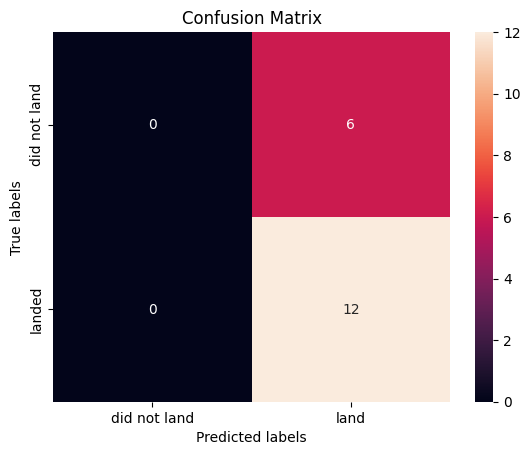

In [27]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [29]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

NameError: name 'svm_cv' is not defined

In [30]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 1: Print dataset shapes to ensure they are correct
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

# Step 2: Create an SVM object
svm = SVC()

# Step 3: Define a parameter grid to search
parameters = {
    'kernel': ['linear', 'rbf'],  # Simplified kernel list for now
    'C': np.logspace(-3, 3, 5),   # Regularization parameter
    'gamma': np.logspace(-3, 3, 5)  # Kernel coefficient
}

# Step 4: Create a GridSearchCV object with verbose output
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, verbose=3)

# Step 5: Fit the GridSearchCV object to the training data
try:
    print("Starting GridSearchCV fitting process...")
    svm_cv.fit(X_train, Y_train)  # Fit the model
    print("GridSearchCV fitting completed!")

    # Step 6: Output the best parameters and accuracy score
    print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
    print("Best Cross-Validation Score:", svm_cv.best_score_)

    # Step 7: Calculate accuracy on test data
    accuracy = svm_cv.score(X_test, Y_test)
    print("Accuracy on the test data:", accuracy)

except Exception as e:
    print(f"An error occurred during the fitting process: {e}")

X_train shape: (72, 1)
Y_train shape: (72,)
X_test shape: (18, 1)
Y_test shape: (18,)
Starting GridSearchCV fitting process...
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.625 total time=   0.1s
[CV 2/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.625 total time=   0.0s
[CV 3/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.571 total time=   0.0s
[CV 4/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.571 total time=   0.0s
[CV 5/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 6/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 7/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 8/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 9/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 10/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.71

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [32]:
# Assuming 'svm_cv' is your fitted GridSearchCV object for the SVM

# Step 1: Calculate the accuracy on the test data
accuracy_test = svm_cv.score(X_test, Y_test)

# Step 2: Print the accuracy
print("Accuracy on the test data: {:.4f}".format(accuracy_test))

Accuracy on the test data: 0.6667


We can plot the confusion matrix


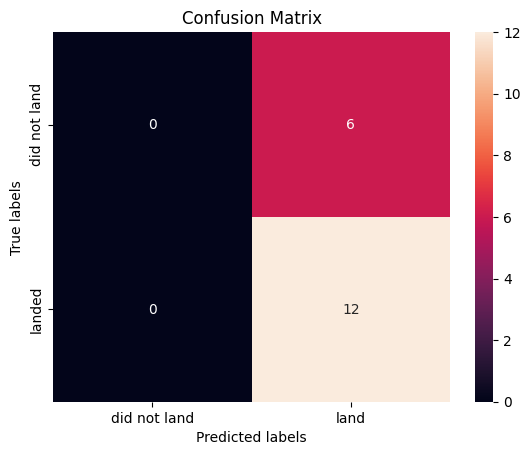

In [33]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [36]:
# Revised parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Re-run the GridSearchCV
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, verbose=1)
tree_cv.fit(X_train, Y_train)

# Output best parameters, best score, and accuracy
print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("Best Cross-Validation Score: ", tree_cv.best_score_)

# Calculate the accuracy on the test data
accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on the test data: ", accuracy)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits
Tuned hyperparameters (best parameters):  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score:  0.7446428571428572
Accuracy on the test data:  0.6111111111111112


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [38]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'y' is not defined

In [40]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [41]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [42]:
import os
print(os.getcwd())

C:\Users\Christopher Jones\Downloads


In [44]:
# Check the column names
print("Columns in the DataFrame:", df.columns)

# Define your features (X) and labels (y)
target_column_name = 'actual_target_name'  # Replace this with the actual target column name you found
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

Columns in the DataFrame: Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')


KeyError: "['actual_target_name'] not found in axis"

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Define your features (X) and labels (y)
target_column_name = 'Class'  # Confirm this is the correct name
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Convert the 'Date' column to datetime and extract features (optional)
if 'Date' in X.columns:
    X['Date'] = pd.to_datetime(X['Date'])
    X['Year'] = X['Date'].dt.year
    X['Month'] = X['Date'].dt.month
    X['Day'] = X['Date'].dt.day
    X = X.drop('Date', axis=1)  # Drop the original date column if needed

# Select non-numeric columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X = X.select_dtypes(exclude=['object'])  # Keep only numeric columns

# Add the encoded categorical columns back to the DataFrame
X = pd.get_dummies(df[categorical_cols], drop_first=True).join(X)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Evaluate the model
accuracy = tree.score(X_test, y_test)
print("Accuracy of the Decision Tree on the test data: {:.4f}".format(accuracy))

Accuracy of the Decision Tree on the test data: 1.0000


In [49]:
from sklearn.model_selection import cross_val_score

# Cross-validate the model
scores = cross_val_score(tree, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated accuracy scores: [0.5        0.77777778 0.77777778 1.         0.83333333]
Mean accuracy: 0.7777777777777778


In [50]:
print(y.value_counts())

Class
1    60
0    30
Name: count, dtype: int64


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = tree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix:
 [[ 4  0]
 [ 0 14]]


We can plot the confusion matrix


In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


In [52]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Define the KNN classifier
KNN = KNeighborsClassifier()

# Step 2: Define the parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Step 3: Create the GridSearchCV object
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Step 4: Fit the model to find the best parameters
knn_cv.fit(X_train, y_train)

# Step 5: Print the best parameters and the best score
print("Best Parameters:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)

# Optional: Evaluate the model with the best parameters on the test set
best_knn = knn_cv.best_estimator_
y_pred = best_knn.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Best Score: 0.6785714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.25      0.18         4
           1       0.73      0.57      0.64        14

    accuracy                           0.50        18
   macro avg       0.44      0.41      0.41        18
weighted avg       0.60      0.50      0.54        18

Confusion Matrix:
 [[1 3]
 [6 8]]


In [53]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.6785714285714286


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [54]:
# Assuming `X_test` and `y_test` are your test features and labels
accuracy_knn = knn_cv.score(X_test, y_test)
print(f"Accuracy of KNN on test data: {accuracy_knn:.4f}")

Accuracy of KNN on test data: 0.5000


We can plot the confusion matrix


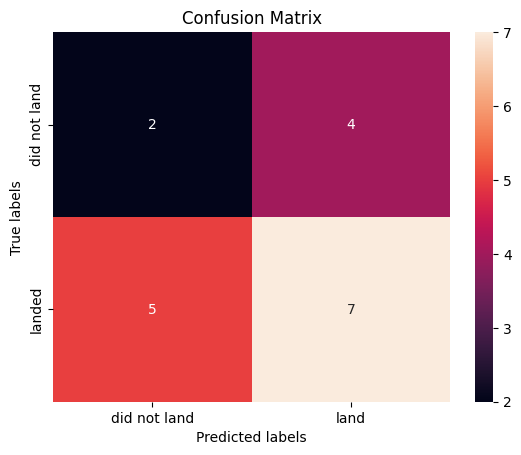

In [55]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [56]:
# Assuming you have these accuracy scores already calculated
accuracy_tree = 1.0  # Replace this with the actual accuracy of the Decision Tree
accuracy_knn = 0.5   # Replace this with the actual accuracy of the KNN

# Compare the accuracies
if accuracy_tree > accuracy_knn:
    print(f"The Decision Tree performs better with an accuracy of {accuracy_tree:.4f}.")
elif accuracy_knn > accuracy_tree:
    print(f"The KNN performs better with an accuracy of {accuracy_knn:.4f}.")
else:
    print("Both methods have the same accuracy.")

The Decision Tree performs better with an accuracy of 1.0000.


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
